In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv("infy_stock_data.csv", index_col="Date", parse_dates=True)
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [3]:
df_close = df[['Close']]
df_close

,Close
Date,
2015-01-01,1974.40
2015-01-02,2013.20
2015-01-05,1995.90
2015-01-06,1954.20
2015-01-07,1963.55
...,...
2015-12-24,1096.35
2015-12-28,1104.75
2015-12-29,1104.70


In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
Q = seasonal_decompose(df_close['Close'], period=30)

<Axes: xlabel='Date'>

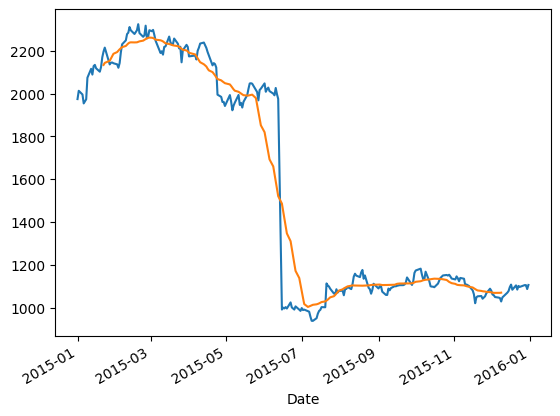

In [6]:
Q.observed.plot()
Q.trend.plot()

<Axes: xlabel='Date'>

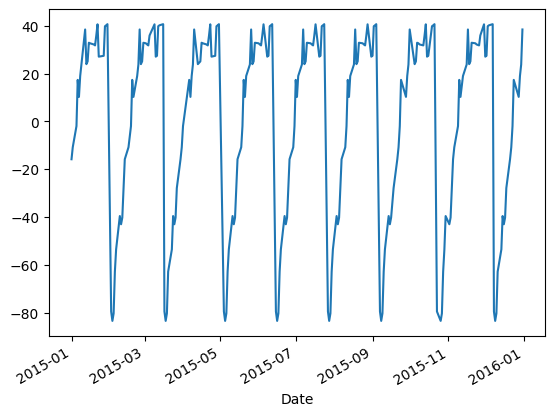

In [7]:

Q.seasonal.plot()

<Axes: xlabel='Date'>

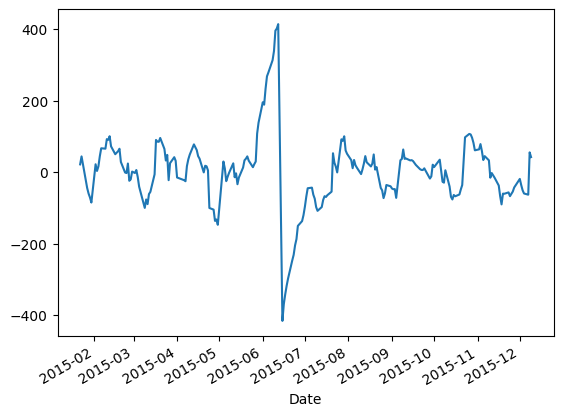

In [8]:

Q.resid.plot()

In [9]:

%pip install pmdarima

  Using cached pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata (8.0 kB)
Using cached pmdarima-2.0.4-cp311-cp311-win_amd64.whl (614 kB)
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   -- ------------------------------------- 0.2/2.8 MB 5.4 MB/s eta 0:00:01
   ----------------- ---------------------- 1.2/2.8 MB 18.9 MB/s eta 0:00:01
   ----------------- ---------------------- 1.2/2.8 MB 18.9 MB/s eta 0:00:01
   ----------------- ---------------------- 1.2/2.8 MB 18.9 MB/s eta 0:00:01
   ----------------- ---------------------- 1.2/2.8 MB 18.9 MB/s eta 0:00:01
   ----------------- ---------------------- 1.2/2.8 MB 18.9 MB/s eta 0:00:01
   -------------------- ------------------- 1.4/2.8 MB 3.4 MB/s eta 0:00:01
   ------------------------- -------------- 1.8/2.8 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------  2.8/2.8 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 5.4 MB/s eta 0:00:00
Note: you may need to restart

In [10]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

fit1 = Holt(df_close['Close'],exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)

c:\Users\Ashutosh\Downloads\Deep Learnig 6_8 PM Thu Fri\repository\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [11]:

fcast1 = fit1.forecast(60)
fcast1

c:\Users\Ashutosh\Downloads\Deep Learnig 6_8 PM Thu Fri\repository\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


248    1104.200735
249    1106.076553
250    1107.955558
251    1109.837755
252    1111.723149
253    1113.611746
254    1115.503552
255    1117.398571
256    1119.296810
257    1121.198273
258    1123.102966
259    1125.010896
260    1126.922066
261    1128.836483
262    1130.754153
263    1132.675080
264    1134.599270
265    1136.526729
266    1138.457463
267    1140.391476
268    1142.328775
269    1144.269365
270    1146.213252
271    1148.160441
272    1150.110938
273    1152.064748
274    1154.021878
275    1155.982332
276    1157.946117
277    1159.913238
278    1161.883701
279    1163.857511
280    1165.834674
281    1167.815196
282    1169.799082
283    1171.786339
284    1173.776971
285    1175.770986
286    1177.768388
287    1179.769182
288    1181.773376
289    1183.780975
290    1185.791984
291    1187.806410
292    1189.824257
293    1191.845533
294    1193.870242
295    1195.898391
296    1197.929985
297    1199.965030
298    1202.003533
299    1204.045499
300    1206.

<Axes: >

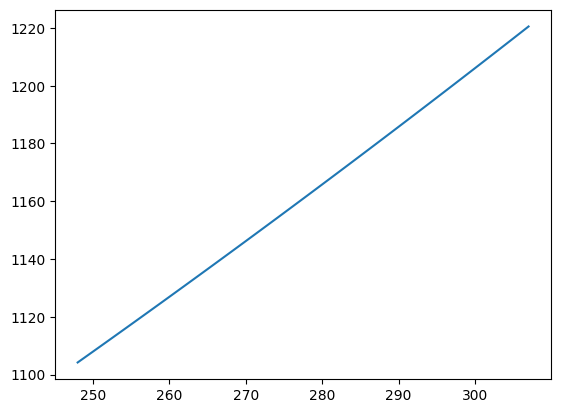

In [13]:


fcast1.plot()

In [16]:

df
     

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-24,INFY,EQ,1100.85,1102.05,1104.45,1090.1,1095.80,1096.35,1095.84,615027,6.739696e+13,20528,294731,0.4792
2015-12-28,INFY,EQ,1096.35,1090.00,1110.00,1090.0,1103.80,1104.75,1105.51,2763476,3.055046e+14,51103,1880078,0.6803
2015-12-29,INFY,EQ,1104.75,1101.25,1110.00,1097.3,1103.00,1104.70,1104.14,1672531,1.846706e+14,52409,967577,0.5785


In [17]:
df = df.drop(columns=['Symbol','Series'])
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2015-01-01,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-24,1100.85,1102.05,1104.45,1090.1,1095.80,1096.35,1095.84,615027,6.739696e+13,20528,294731,0.4792
2015-12-28,1096.35,1090.00,1110.00,1090.0,1103.80,1104.75,1105.51,2763476,3.055046e+14,51103,1880078,0.6803
2015-12-29,1104.75,1101.25,1110.00,1097.3,1103.00,1104.70,1104.14,1672531,1.846706e+14,52409,967577,0.5785


In [18]:

df.dtypes

Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                  int64
Deliverable Volume      int64
%Deliverble           float64
dtype: object

In [19]:
from sklearn.ensemble import IsolationForest
     

In [20]:
aif = IsolationForest(random_state=0)
aif.fit(df)

IsolationForest(random_state=0)

In [21]:

preds = aif.predict(df)

In [22]:
preds

array([-1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1,
        1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1

In [23]:
df['Anomaly'] = preds

In [24]:
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Anomaly
Date,,,,,,,,,,,,,
2015-01-01,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,-1
2015-01-02,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,1
2015-01-05,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,1
2015-01-06,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,1
2015-01-07,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-24,1100.85,1102.05,1104.45,1090.1,1095.80,1096.35,1095.84,615027,6.739696e+13,20528,294731,0.4792,1
2015-12-28,1096.35,1090.00,1110.00,1090.0,1103.80,1104.75,1105.51,2763476,3.055046e+14,51103,1880078,0.6803,1
2015-12-29,1104.75,1101.25,1110.00,1097.3,1103.00,1104.70,1104.14,1672531,1.846706e+14,52409,967577,0.5785,1


In [25]:
df[df['Anomaly']==-1]

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Anomaly
Date,,,,,,,,,,,,,
2015-01-01,1972.55,1968.95,1982.00,1956.90,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,-1
2015-01-09,1973.45,1980.10,2109.00,1913.05,2075.30,2074.45,2037.69,11215832,2.285439e+15,359214,3369489,0.3004,-1
2015-01-12,2074.45,2092.00,2119.20,2075.00,2112.95,2115.95,2099.40,3189722,6.696516e+14,107209,1818800,0.5702,-1
2015-01-27,2215.05,2221.00,2221.00,2130.10,2137.55,2136.50,2146.45,3434992,7.373022e+14,117167,2765575,0.8051,-1
2015-02-13,2311.20,2299.60,2326.70,2286.00,2294.00,2296.10,2303.89,1414379,3.258572e+14,46058,952136,0.6732,-1
2015-02-18,2278.75,2290.55,2304.95,2258.15,2292.05,2296.50,2282.33,2153441,4.914857e+14,64543,1705768,0.7921,-1
2015-02-19,2296.50,2294.00,2334.00,2292.05,2323.20,2324.70,2322.17,2418406,5.615938e+14,61974,1750981,0.7240,-1
2015-02-20,2324.70,2328.50,2336.00,2276.90,2280.50,2283.10,2298.14,1742907,4.005441e+14,70405,1271861,0.7297,-1
2015-02-25,2272.80,2288.90,2334.80,2280.00,2314.00,2317.60,2316.82,1511243,3.501282e+14,60669,913751,0.6046,-1


In [26]:

df_close

,Close
Date,
2015-01-01,1974.40
2015-01-02,2013.20
2015-01-05,1995.90
2015-01-06,1954.20
2015-01-07,1963.55
...,...
2015-12-24,1096.35
2015-12-28,1104.75
2015-12-29,1104.70


In [27]:
clf2 = IsolationForest(random_state=0)
clf2.fit(df_close)

IsolationForest(random_state=0)

In [28]:
preds2 = clf2.predict(df_close)

In [29]:

preds2

array([ 1,  1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,
       -1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,
       -1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1,
        1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1,
        1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1,
        1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1, -1,  1,  1,  1

In [30]:
df_close['Anomaly'] = preds2

In [31]:
df_close

,Close,Anomaly
Date,,
2015-01-01,1974.40,1
2015-01-02,2013.20,1
2015-01-05,1995.90,1
2015-01-06,1954.20,-1
2015-01-07,1963.55,1
...,...,...
2015-12-24,1096.35,1
2015-12-28,1104.75,1
2015-12-29,1104.70,1


<Axes: xlabel='Date', ylabel='Close'>

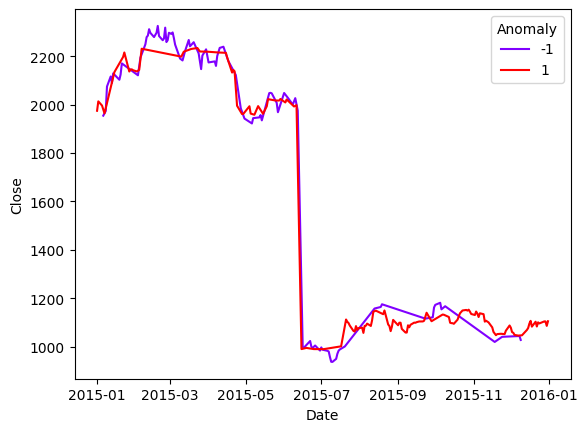

In [32]:
import seaborn as sns
sns.lineplot(x=df_close.index, y=df_close['Close'], hue=df_close['Anomaly'],
             palette='rainbow')